In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tfdot import tfdot

[ 0.78384481  0.58481799  0.48827138  0.35337022  0.29708648]
0.58481798587


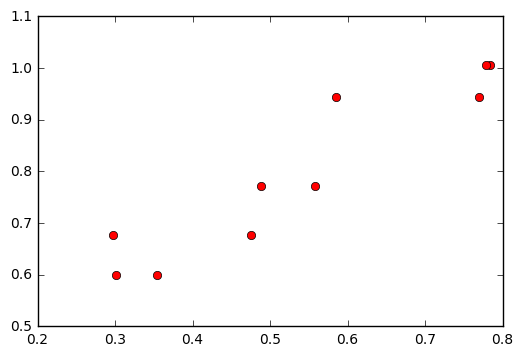

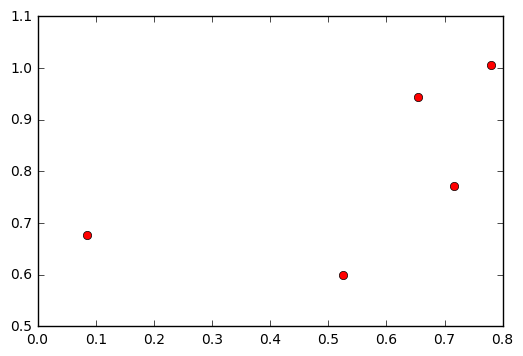

In [12]:
#X
train_x1 = np.random.normal(0.5, 0.2, 5)  #產生100個平均=0.5, 標準差=0.2的成績
train_x2 = np.random.normal(0.5, 0.2, 5)  #產生100個平均=0.5, 標準差=0.2的成績
train_x3 = np.random.normal(0.5, 0.2, 5)  #產生100個平均=0.5, 標準差=0.2的成績
print(train_x1)
print(train_x1[1])
#Y
a = 0.3
b = 0.7
c = 0.1
d=0.2
train_y = a*train_x1+b*train_x2+c*train_x3+d+np.random.normal(0.0,0.03,5)
plt.plot(train_x1,train_y,'ro', label='inputdata')

plt.plot(train_x2,train_y,'ro', label='inputdata')
plt.show()
plt.plot(train_x3,train_y,'ro', label='inputdata')
plt.show()

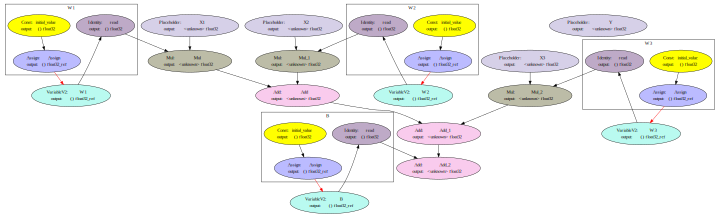

In [14]:
tf.reset_default_graph()
# Training Data
X1 = tf.placeholder('float', name="X1")
X2 = tf.placeholder('float', name="X2")
X3 = tf.placeholder('float', name="X3")
Y = tf.placeholder('float', name="Y")
#權重
W1 = tf.Variable(np.random.randn(), name='W1')
W2 = tf.Variable(np.random.randn(), name='W2')
W3 = tf.Variable(np.random.randn(), name='W3')

#Bias
B = tf.Variable(np.random.randn(), name='B') 

#計算出來的Y

pred = tf.add(tf.add(tf.add(tf.multiply(X1, W1),tf.multiply(X2, W2)), tf.multiply(X3, W3)), B)


tfdot()

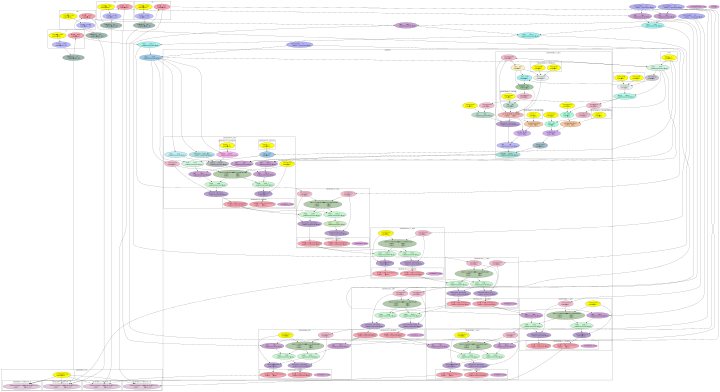

In [4]:
cost_function = tf.reduce_mean(tf.pow(pred-Y, 2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost_function)
init = tf.global_variables_initializer()
tfdot()

In [5]:
cost_function

<tf.Tensor 'Mean:0' shape=<unknown> dtype=float32>

In [6]:
len(train_x1[[1,2]])

2

In [7]:
sess = tf.InteractiveSession()
sess.run(init)
for epoh in range(1000):
    #rnd_idx = np.random.choice(train_x.shape[0], 50, replace=False)
    sess.run(train_step, feed_dict={X1: train_x1, X2:train_x2, X3:train_x3, Y: train_y[:]})
    if (epoh) % 20 == 0:
        c = sess.run(cost_function, feed_dict={X1: train_x1, X2:train_x2, X3:train_x3, Y:train_y})
        print ("Epoch:", epoh,  "B=", sess.run(B),"cost=", "{:.9f}".format(c), )

Epoch: 0 B= 0.959288 cost= 1.887445927
Epoch: 20 B= 0.567682 cost= 0.551168203
Epoch: 40 B= 0.370225 cost= 0.204684824
Epoch: 60 B= 0.271321 cost= 0.113470294
Epoch: 80 B= 0.222431 cost= 0.088132858
Epoch: 100 B= 0.198907 cost= 0.079837970
Epoch: 120 B= 0.188235 cost= 0.075992249
Epoch: 140 B= 0.184059 cost= 0.073346920
Epoch: 160 B= 0.183155 cost= 0.071062580
Epoch: 180 B= 0.183884 cost= 0.068921164
Epoch: 200 B= 0.185416 cost= 0.066864856
Epoch: 220 B= 0.187328 cost= 0.064877242
Epoch: 240 B= 0.189408 cost= 0.062952496
Epoch: 260 B= 0.191547 cost= 0.061087780
Epoch: 280 B= 0.193691 cost= 0.059280917
Epoch: 300 B= 0.195813 cost= 0.057530034
Epoch: 320 B= 0.197899 cost= 0.055833325
Epoch: 340 B= 0.199943 cost= 0.054189056
Epoch: 360 B= 0.201943 cost= 0.052595563
Epoch: 380 B= 0.203897 cost= 0.051051237
Epoch: 400 B= 0.205806 cost= 0.049554504
Epoch: 420 B= 0.207669 cost= 0.048103891
Epoch: 440 B= 0.209487 cost= 0.046697874
Epoch: 460 B= 0.211262 cost= 0.045335136
Epoch: 480 B= 0.212992

In [8]:
print('W1:',sess.run(W1))
print('B:',sess.run(B))

W1: 0.819592
B: 0.245053


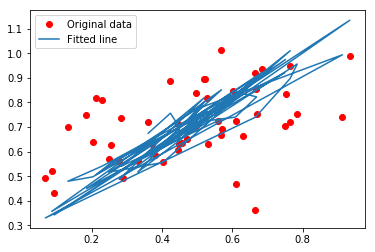

In [9]:
plt.plot(train_x1, train_y, 'ro', label='Original data')
plt.plot(train_x1, sess.run(W1) * train_x1 +sess.run(W2) * train_x2+sess.run(W3) * train_x3+ sess.run(B), label='Fitted line')
plt.legend()
plt.show()